### NYT api document:
https://developer.nytimes.com/docs/books-product/1/routes/lists/overview.json/get

# 1. Character title count vs weeks on bestsellers list

## Research Question:
- Do shorter book titles lead to more weeks on the bestseller list?

## Research Hypothesis:
- H₀: 𝛽 = 0 , The number of characters in a book title does not impact how many weeks books last on the bestseller list.
- H₁: 𝛽 < 0 , Longer titles negatively associate with more weeks on the bestseller list.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import requests
NYT_API_KEY = ""

In [ ]:
url = f'https://api.nytimes.com/svc/books/v3/lists/overview.json?api-key={NYT_API_KEY}'

response = requests.get(url)

data = response.json()
print(response.status_code)

200


In [ ]:
overview_data = data['results']
overview_data_df = pd.DataFrame(overview_data)
print(overview_data_df[['published_date','lists']])

   published_date                                              lists
0      2025-10-19  {'display_name': 'Combined Print & E-Book Fict...
1      2025-10-19  {'display_name': 'Combined Print & E-Book Nonf...
2      2025-10-19  {'display_name': 'Hardcover Fiction', 'list_na...
3      2025-10-19  {'display_name': 'Hardcover Nonfiction', 'list...
4      2025-10-19  {'display_name': 'Paperback Trade Fiction', 'l...
5      2025-10-19  {'display_name': 'Paperback Nonfiction', 'list...
6      2025-10-19  {'display_name': 'Advice, How-To & Miscellaneo...
7      2025-10-19  {'display_name': 'Children’s Middle Grade Hard...
8      2025-10-19  {'display_name': 'Children’s Picture Books', '...
9      2025-10-19  {'display_name': 'Children’s & Young Adult Ser...
10     2025-10-19  {'display_name': 'Young Adult Hardcover', 'lis...
11     2025-10-19  {'display_name': 'Audio Fiction', 'list_name':...
12     2025-10-19  {'display_name': 'Audio Nonfiction', 'list_nam...
13     2025-10-19  {'display_name'

In [ ]:
list_published_date = overview_data_df.loc[0, ['published_date']]
print(f"Recent Published Date: \n {list_published_date}")

Recent Published Date: 
 published_date    2025-10-19
Name: 0, dtype: object


# Making, combining, and cleaning data frame for every type of list

In [ ]:
list_names = overview_data['lists']
list_names_df = pd.DataFrame(list_names)
print("All Bestsellers List Names:")
print(list_names_df['list_name_encoded'])

all_books_ls = []

for i in range(11): #exluding monthly bestseller list_name
    list_info = overview_data['lists'][i]
    list_name = list_info['list_name_encoded']
    books = list_info['books']

    df = pd.DataFrame(books)
    df['list_name'] = list_name
    df['published_date'] = overview_data['published_date']

    all_books_ls.append(df)

All Bestsellers List Names:
0        combined-print-and-e-book-fiction
1     combined-print-and-e-book-nonfiction
2                        hardcover-fiction
3                     hardcover-nonfiction
4                  trade-fiction-paperback
5                     paperback-nonfiction
6          advice-how-to-and-miscellaneous
7         childrens-middle-grade-hardcover
8                            picture-books
9                             series-books
10                   young-adult-hardcover
11                           audio-fiction
12                        audio-nonfiction
13                          business-books
14                 graphic-books-and-manga
15                     mass-market-monthly
16          middle-grade-paperback-monthly
17           young-adult-paperback-monthly
Name: list_name_encoded, dtype: object


In [ ]:
combined_books_df = pd.concat(all_books_ls, ignore_index=True)
print(combined_books_df[['published_date','rank','title','weeks_on_list','list_name']])

    published_date  rank                       title  weeks_on_list  \
0       2025-10-19     1      THE IMPOSSIBLE FORTUNE              1   
1       2025-10-19     2       THE SECRET OF SECRETS              4   
2       2025-10-19     3                  ALCHEMISED              2   
3       2025-10-19     4                 FOURTH WING             98   
4       2025-10-19     5  VINCE FLYNN: DENIED ACCESS              1   
..             ...   ...                         ...            ...   
135     2025-10-19     6            THE WEAVER BRIDE              1   
136     2025-10-19     7           HEKATE: THE WITCH              3   
137     2025-10-19     8          WINGS OF STARLIGHT             35   
138     2025-10-19     9         A STUDY IN DROWNING             26   
139     2025-10-19    10        A THEORY OF DREAMING             10   

                             list_name  
0    combined-print-and-e-book-fiction  
1    combined-print-and-e-book-fiction  
2    combined-print-and-

In [ ]:
combined_books_df.isnull().sum()

,0
age_group,0
amazon_product_url,0
article_chapter_link,0
asterisk,0
author,0
book_image,0
book_image_height,0
book_image_width,0
book_review_link,0
book_uri,0


# count how many characters (letters, spaces, integers, special characters, etc.) in book title

In [ ]:
combined_books_df['title_character_count'] = combined_books_df['title'].apply(len)
print(combined_books_df[['title', 'title_character_count','weeks_on_list']])

                          title  title_character_count  weeks_on_list
0        THE IMPOSSIBLE FORTUNE                     22              1
1         THE SECRET OF SECRETS                     21              4
2                    ALCHEMISED                     10              2
3                   FOURTH WING                     11             98
4    VINCE FLYNN: DENIED ACCESS                     26              1
..                          ...                    ...            ...
135            THE WEAVER BRIDE                     16              1
136           HEKATE: THE WITCH                     17              3
137          WINGS OF STARLIGHT                     18             35
138         A STUDY IN DROWNING                     19             26
139        A THEORY OF DREAMING                     20             10

[140 rows x 3 columns]


### Plotting

Text(0.5, 1.0, 'Weeks on List by Title Length Scatter Plot')

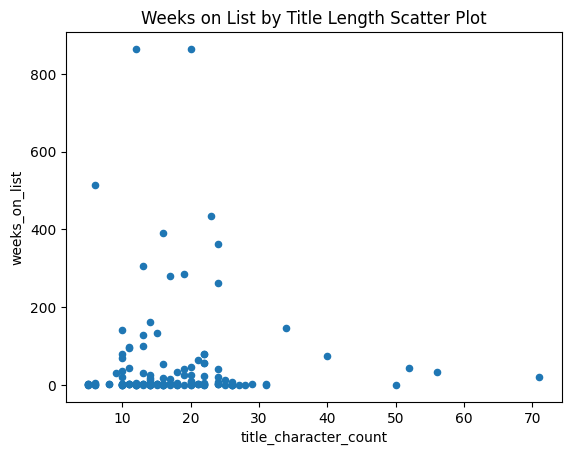

In [ ]:
combined_books_df.plot.scatter('title_character_count','weeks_on_list')
plt.title('Weeks on List by Title Length Scatter Plot')

### some unrelated-unique findings:

In [ ]:
most_tc_count = combined_books_df.loc[combined_books_df['title_character_count'].idxmax()]
most_wl_count = combined_books_df.loc[combined_books_df['weeks_on_list'].idxmax()]

print("the book that has the longest title:")
print(most_tc_count[['title','title_character_count',"list_name"]])
print("-------------------------------------")
print("the book that stayed the longest in the bestsellers list:")
print(most_wl_count[['title','weeks_on_list', 'list_name']])



the book that has the longest title:
title                    THE MILLICENT QUIBB SCHOOL OF ETIQUETTE FOR YO...
title_character_count                                                   71
list_name                                 childrens-middle-grade-hardcover
Name: 107, dtype: object
-------------------------------------
the book that stayed the longest in the bestsellers list:
title            DIARY OF A WIMPY KID
weeks_on_list                     864
list_name                series-books
Name: 124, dtype: object


### Analysis correlation and t-test

In [ ]:
correlation = combined_books_df['title_character_count'].corr(combined_books_df['weeks_on_list'])
print(f"Correlation between title character count and weeks on list: {correlation}")

Correlation between title character count and weeks on list: -0.006580085206039953


In [ ]:
import statsmodels.api as sm

X = combined_books_df['title_character_count']
y = combined_books_df['weeks_on_list']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          weeks_on_list   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                  0.005975
Date:                Sat, 11 Oct 2025   Prob (F-statistic):              0.938
Time:                        20:00:35   Log-Likelihood:                -880.92
No. Observations:                 140   AIC:                             1766.
Df Residuals:                     138   BIC:                             1772.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    51.83

# conclusion:
- R-squared = 0.000, almost zero, which means that there is low correlation between x and y
- p-value: 0.938 > 0.05, fail to reject H0 or there's no statistically significant evidence that title length affects bestseller longevity.


# 2. Genre-based longevity

## Research Question:
- Does the average week books tend to stay on the bestsellers list differ accros list types?

## Research Hypothesis
- H₀: Average weeks on list is the same across list type
- H₁: Some list types have significantly longer average stays on the list

In [ ]:
grouped_df = combined_books_df.groupby('list_name')['weeks_on_list'].mean()
print("average week on list per list_name:")
print(grouped_df)

average week on list per list_name:
list_name
advice-how-to-and-miscellaneous          42.600000
childrens-middle-grade-hardcover         62.500000
combined-print-and-e-book-fiction        19.200000
combined-print-and-e-book-nonfiction     24.866667
hardcover-fiction                        15.400000
hardcover-nonfiction                      8.733333
paperback-nonfiction                    102.533333
picture-books                            22.000000
series-books                            267.900000
trade-fiction-paperback                  28.400000
young-adult-hardcover                     9.600000
Name: weeks_on_list, dtype: float64


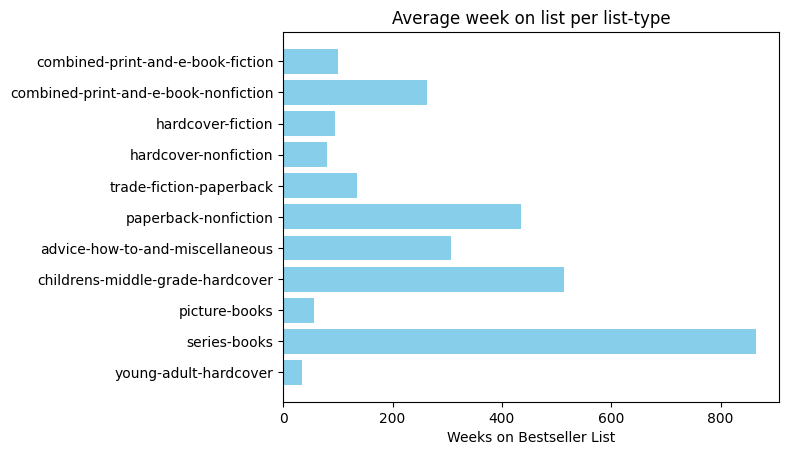

In [ ]:
avg_weeks = combined_books_df.sort_values('weeks_on_list', ascending=False)

plt.barh(combined_books_df['list_name'], combined_books_df['weeks_on_list'], color='skyblue')
plt.xlabel('Weeks on Bestseller List')
plt.title('Average week on list per list-type')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
grouped = combined_books_df.groupby('list_name')['weeks_on_list'].apply(list)
stats.f_oneway(*grouped)


F_onewayResult(statistic=np.float64(4.476471170132472), pvalue=np.float64(2.0079970946198793e-05))

# ANOVA Test Results Interpretation

The ANOVA test was conducted to determine if there is a statistically significant difference in the average number of weeks books stay on the bestseller list across different list types.

- **F-statistic:** 4.476
- **p-value:** 2.008e-05

Since the p-value (2.008e-05) is much smaller than the significance level of 0.05, we reject the null hypothesis (H₀).

**Conclusion:** There is statistically significant evidence to conclude that the average number of weeks books stay on the bestseller list differs across different list types (genres).

# conclusion:
- p-value: 0.0000 < 0.05 , reject H0 -> There is statistically significant evidence that average weeks on the bestseller list differ across genres.